# Technical Analysis: Trend and Momentum Trading (TA-Lib)

This Notebook explores the fundamental concepts of technical stock analysis using the yfinance, pandas, and TA-Lib libraries. It focuses on identifying trends (Moving Averages) and momentum (RSI and MACD), as well as detecting candlestick patterns (Engulfing), preparing the data for advanced visualization with mplfinance.

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import talib as ta
import numpy as np
import pandas_datareader as web
import datetime as dt

In [39]:
data = web.DataReader("NVDA",'stooq', start="2025-01-01", end="2025-11-28")
print(data.head())


               Open    High     Low   Close     Volume
Date                                                  
2025-11-28  179.010  179.29  176.50  177.00  121332776
2025-11-26  181.630  182.91  178.24  180.26  183852010
2025-11-25  174.910  178.16  169.55  177.82  320600271
2025-11-24  179.490  183.50  176.48  182.55  256618335
2025-11-21  181.235  184.56  172.93  178.88  346926153


## Simple and Exponential Moving Averages

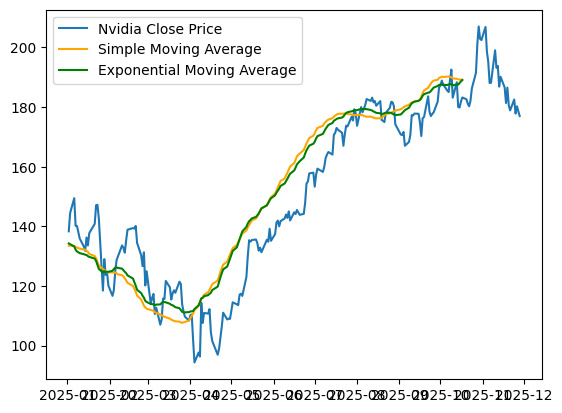

In [40]:
data['SMA'] = ta.SMA(data['Close'])  # Simple Moving Average
data['EMA'] = ta.EMA(data['Close'])  # Exponential Moving Average
plt.plot(data['Close'], label = 'Nvidia Close Price')
plt.plot(data['SMA'], color = 'orange',label = 'Simple Moving Average')
plt.plot(data['EMA'], color = 'green', label = 'Exponential Moving Average')
plt.legend()

## Relative Strength Index 

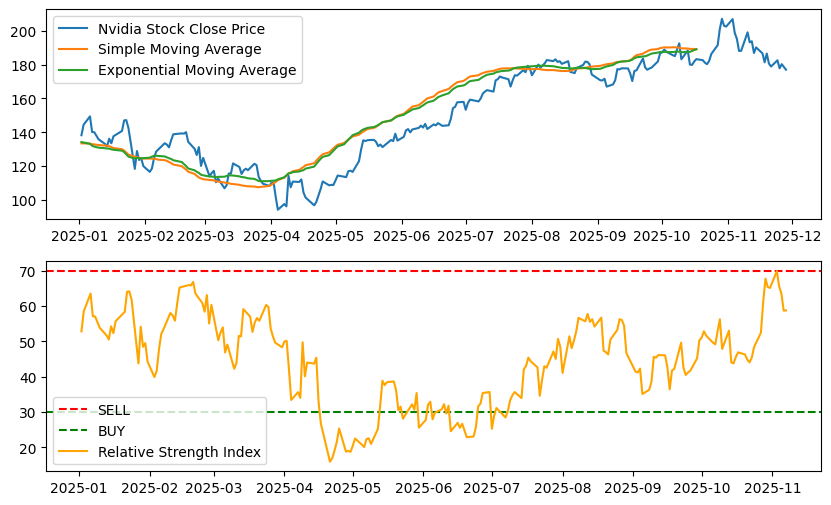

In [41]:
data['RSI'] = ta.RSI(data['Close'])  # Relative Strength Index

fig, axs = plt.subplots(2,1, figsize = (10,6))
axs[0].plot(data['Close'], label='Nvidia Stock Close Price')
axs[0].plot(data['SMA'], label='Simple Moving Average')
axs[0].plot(data['EMA'], label='Exponential Moving Average')
axs[0].legend()
axs[1].axhline(70, color='red', linestyle='--', label = 'SELL') #overbought (SELL SIGNAL)
axs[1].axhline(30, color='green', linestyle='--', label = 'BUY') #oversold (BUY SIGNAL)
axs[1].plot(data['RSI'], label='Relative Strength Index', color = 'orange')
axs[1].legend()



## Linear Regression

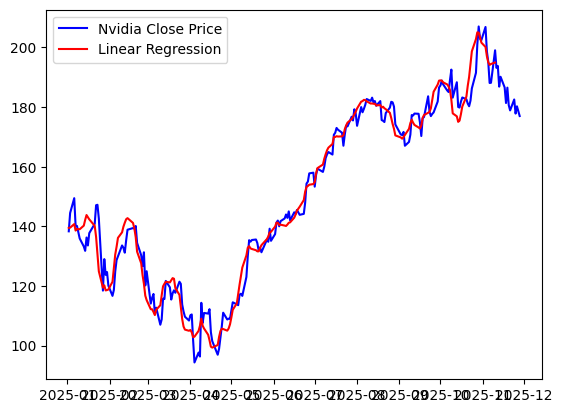

In [42]:
data['Linear_Regression'] = ta.LINEARREG(data['Close'])  # Linear Regression
plt.plot(data['Close'], color = 'blue', label = 'Nvidia Close Price')
plt.plot(data['Linear_Regression'], color = 'red', label = 'Linear Regression')
plt.legend()

## Macd 


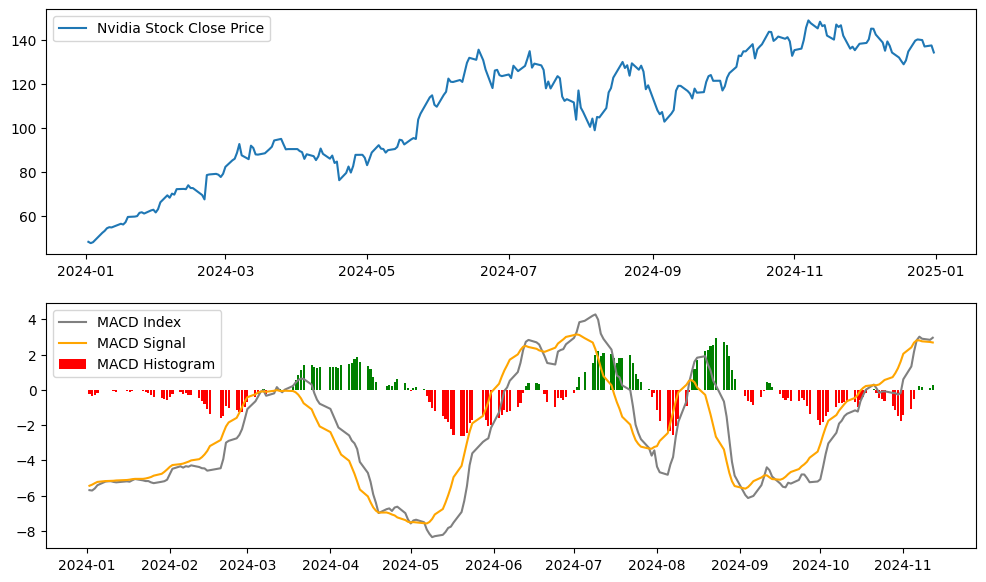

In [43]:
start_time =dt.datetime(2024,1,1)
end_time = dt.datetime(2025,1,1)
data = web.DataReader("NVDA",'stooq', start=start_time, end=end_time)
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2,1, figsize = (12,7))
c = ['green' if diff > 0 else 'red' for diff in macd_hist]
axs[0].plot(data['Close'], label='Nvidia Stock Close Price')
axs[0].legend()
axs[1].plot(macd, label='MACD Index', color = 'Grey')
axs[1].plot(macd_signal, label='MACD Signal', color = 'orange')
axs[1].bar(macd_hist.index, macd_hist, label='MACD Histogram', color = c)
axs[1].legend()

The MACD Histogram is a buy signal when it crosses from negative to positive (rising above the zero line), confirming the MACD Line has crossed the Signal Line upwards. Conversely, it is a sell signal when it crosses from positive to negative.

## SMA of Standard Deviation for a smoothed Volatility

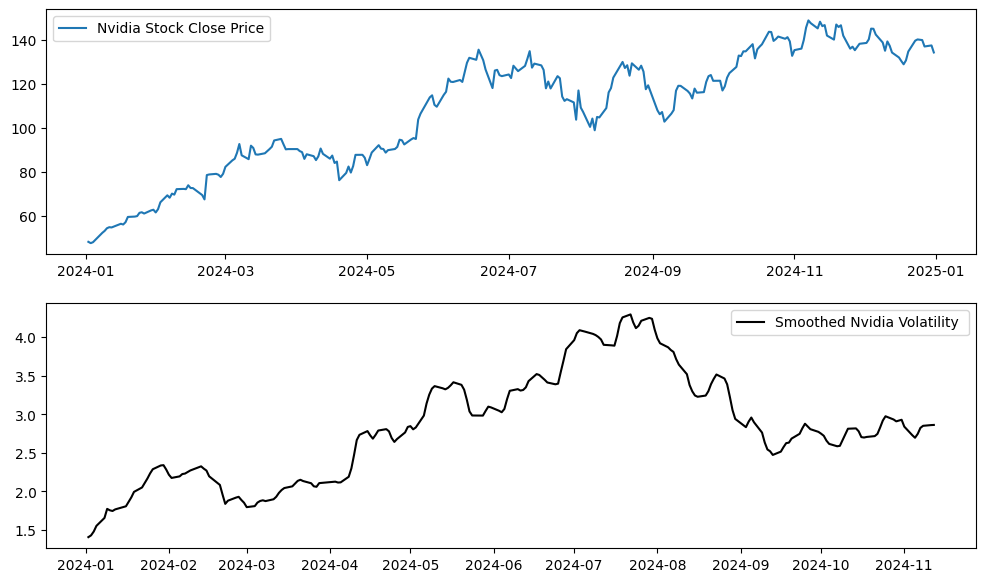

In [44]:
std = ta.STDDEV(data['Close'])
fig, axs = plt.subplots(2,1, figsize = (12,7))
SMA_std = ta.SMA(std)
axs[0].plot(data['Close'], label='Nvidia Stock Close Price')
axs[0].legend()
axs[1].plot(SMA_std, label='Smoothed Nvidia Volatility ', color = 'Black')
axs[1].legend()

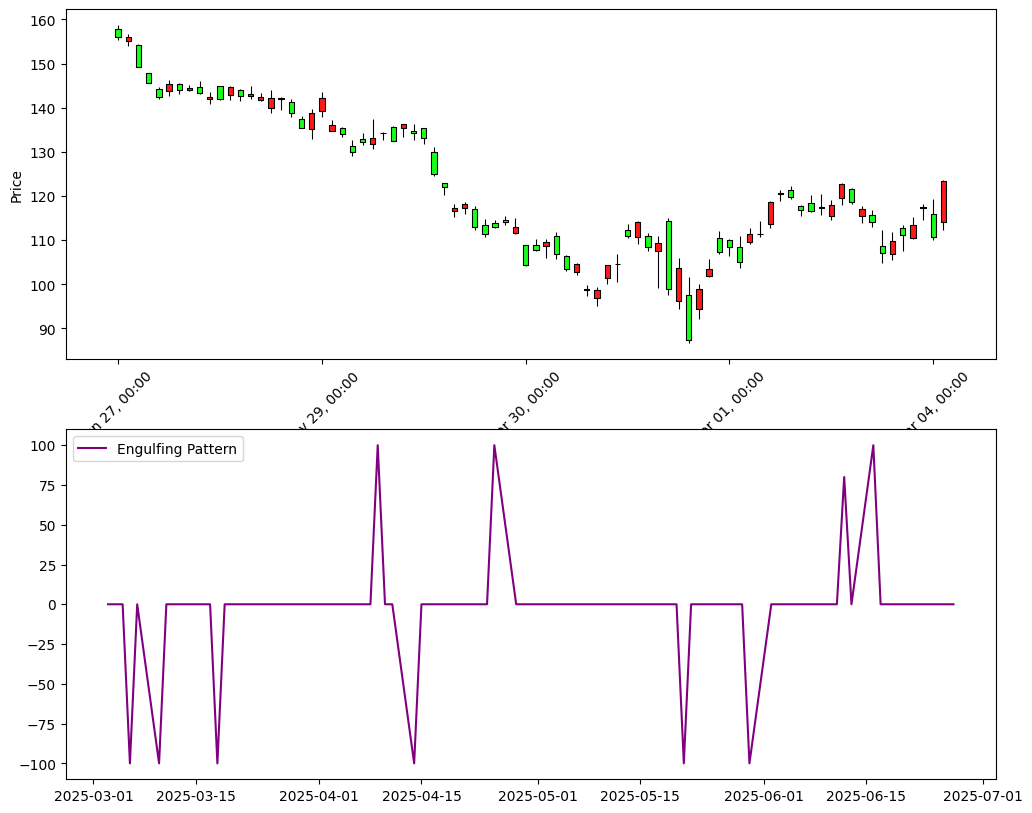

In [45]:
import mplfinance as mpf
data = web.DataReader("NVDA",'stooq', start="2025-03-01", end="2025-06-28")
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])
fig, axes = plt.subplots(2,1, figsize = (12,10))
colors = mpf.make_marketcolors(up='#00FF00', down='#FF0000')
mpf_style = mpf.make_mpf_style(marketcolors=colors)
mpf.plot(data, type = 'candle', ax=axes[0], style = mpf_style )
axes[1].plot(data['ENGULFING'], label='Engulfing Pattern', color = 'purple')
plt.legend()

When there's a spike upwards, it's buy zone!
When there's a spike downwards, it's sell zone!